## **Mall Customers**

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import sklearn
import sqlite3
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [10]:
url='db.sqlite3'
conexion=sqlite3.connect(url)
consulta_sql='SELECT * FROM customer'
df=pd.read_sql_query(consulta_sql,conexion)
df=df.copy()
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
df=df.drop(columns=['CustomerID'],axis=1)
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    object
 2   Annual Income (k$)      200 non-null    object
 3   Spending Score (1-100)  200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [24]:
# Convertir las columnas a números enteros
df['Age'] = df['Age'].astype(int)
df['Annual Income (k$)'] = df['Annual Income (k$)'].astype(int)
df['Spending Score (1-100)'] = df['Spending Score (1-100)'].astype(int)


In [30]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [25]:
col=df.select_dtypes(include='object').columns
col

Index(['Gender'], dtype='object')

In [14]:
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

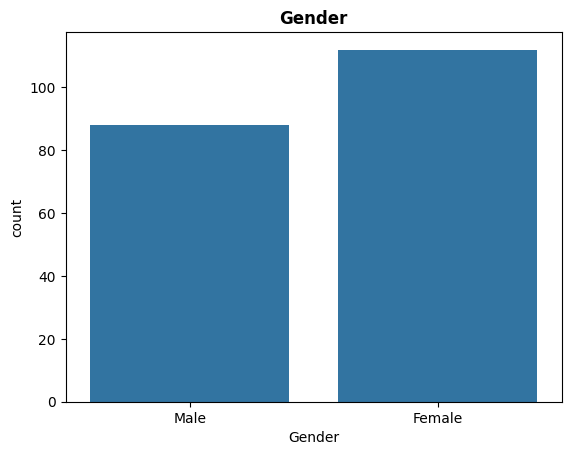

In [26]:
sns.countplot(data=df,x='Gender')
plt.title('Gender',weight='bold')
plt.show()

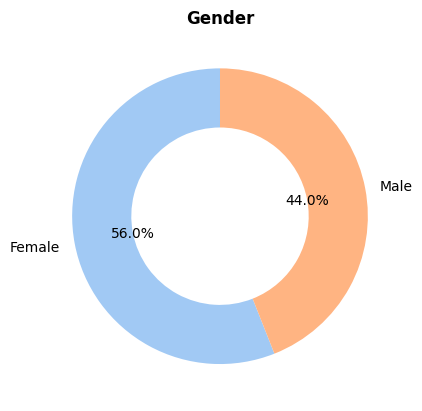

In [27]:
# Crear un gráfico circular (pie chart)
gender_counts = df['Gender'].value_counts()
labels = gender_counts.index
sizes = gender_counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'), wedgeprops=dict(width=0.4))
plt.title('Gender', weight='bold')
plt.show()


In [28]:
num=df.select_dtypes(include='number').columns
num

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

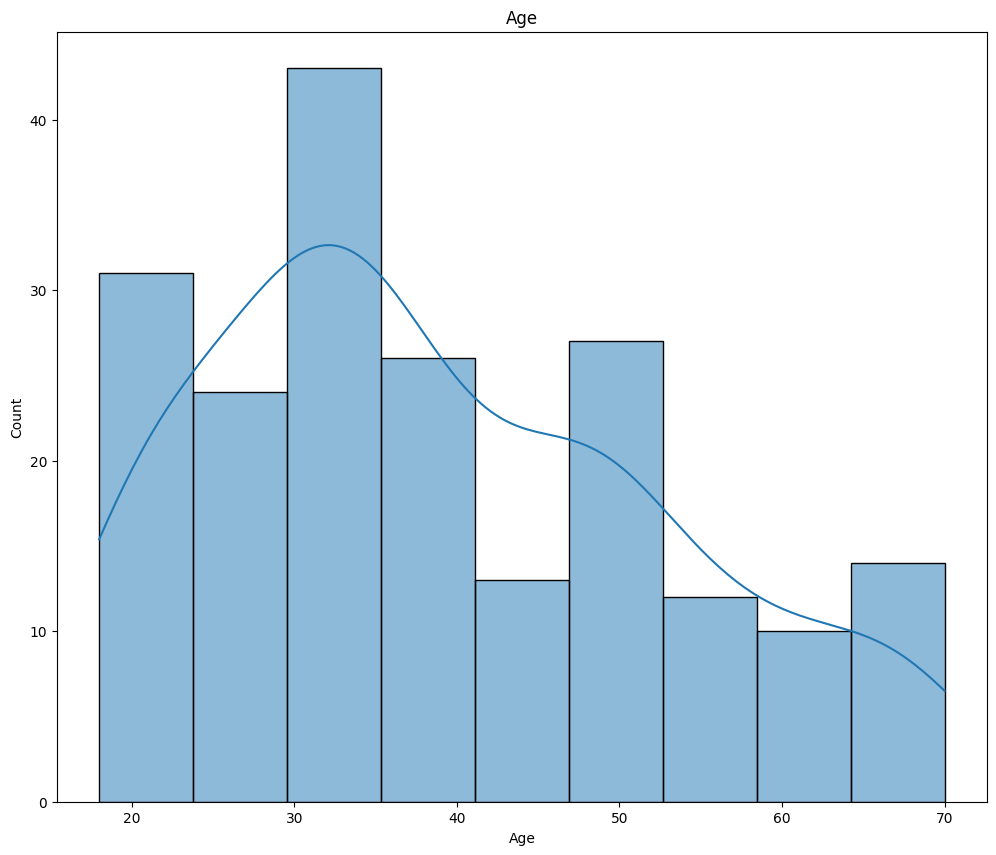

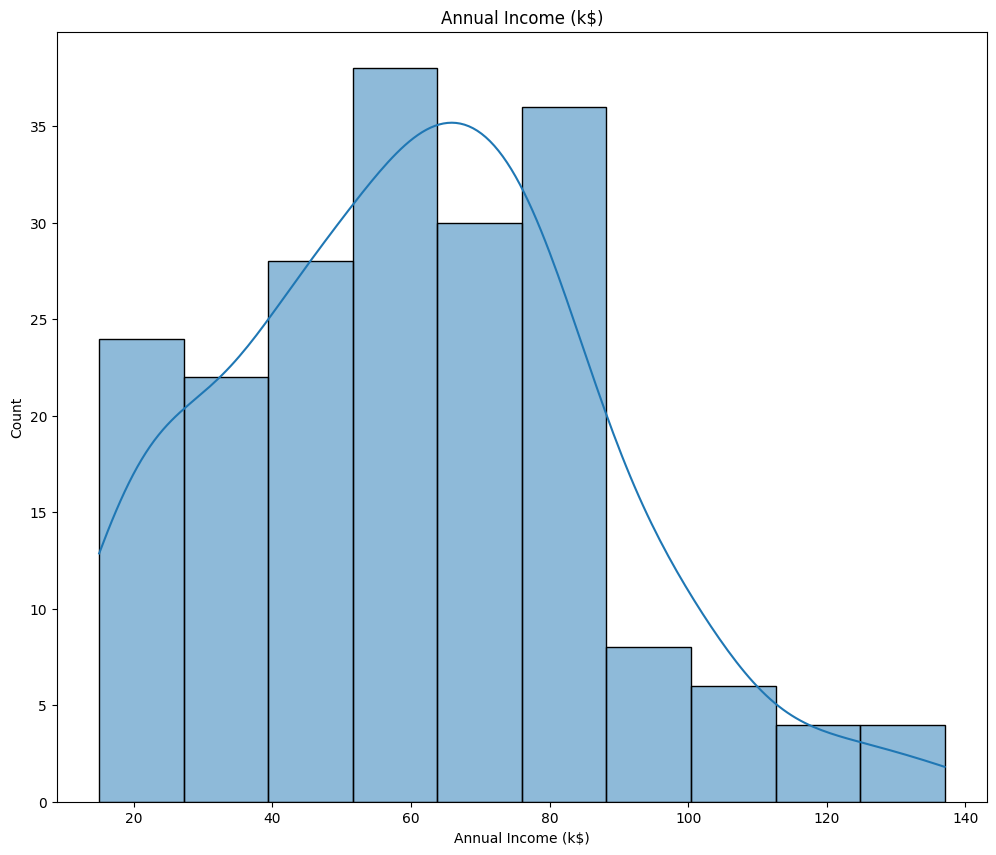

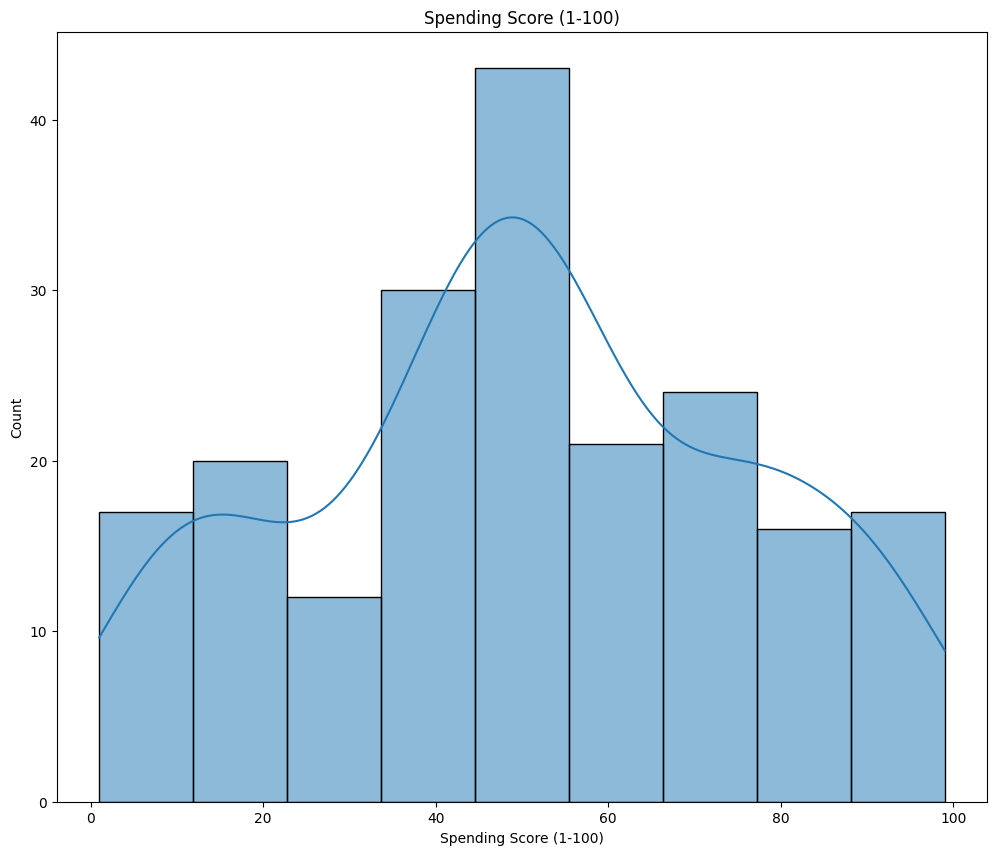

In [29]:
for i in num:
    plt.figure(figsize=(12,10))
    sns.histplot(data=df,x=i,kde=True)
    plt.title(i)
    plt.show()

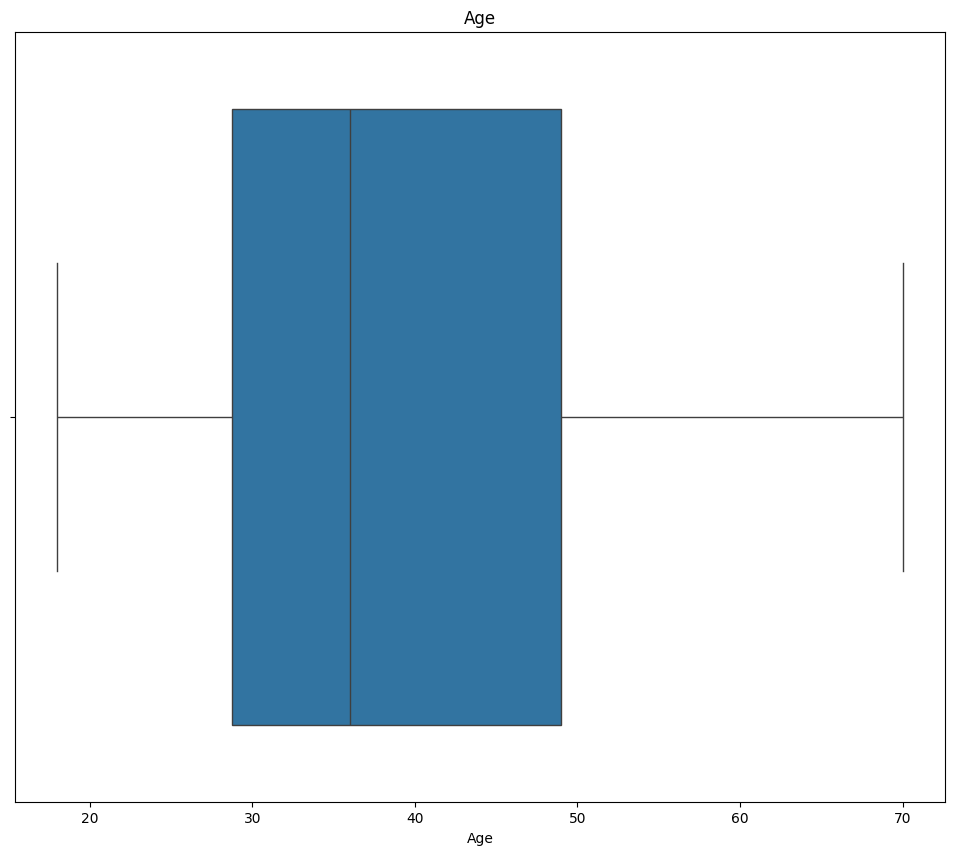

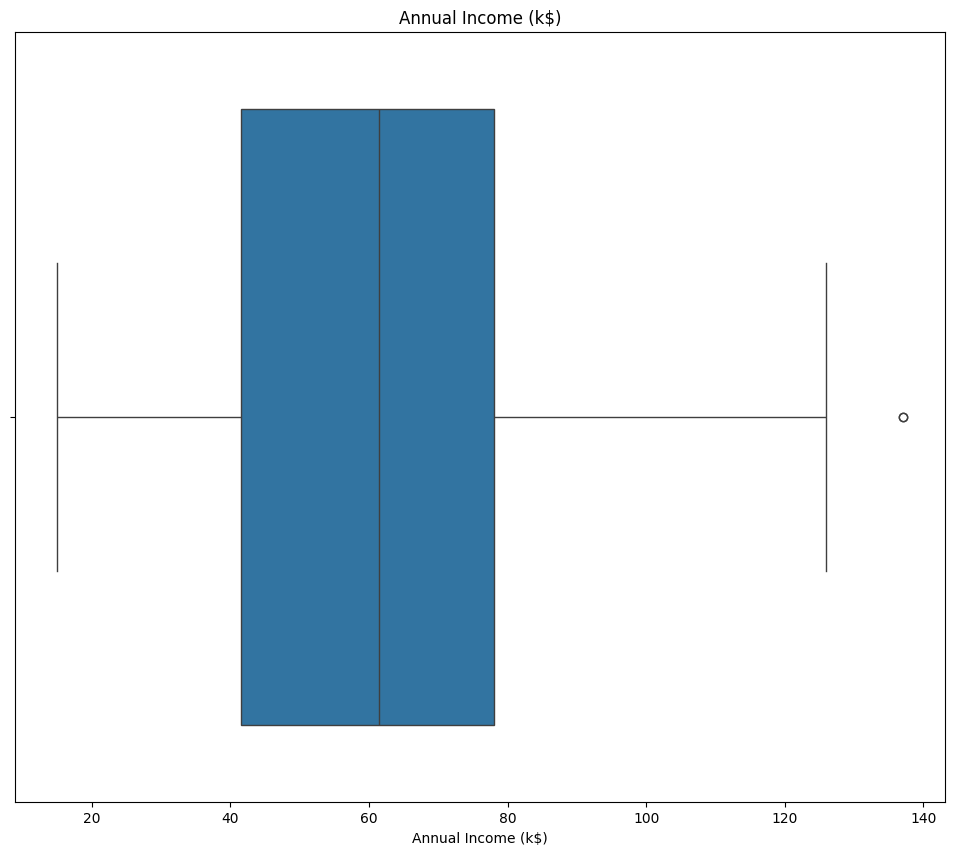

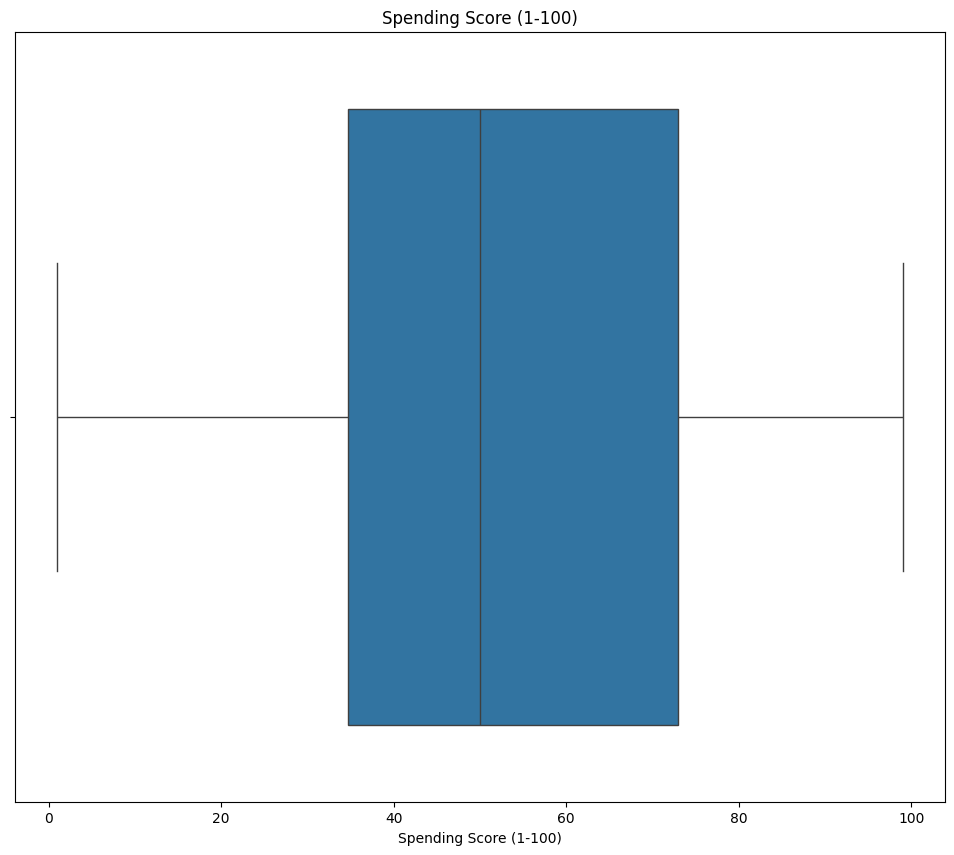

In [32]:
for i in num:
    plt.figure(figsize=(12,10))
    sns.boxplot(data=df,x=i)
    plt.title(i)
    plt.show()

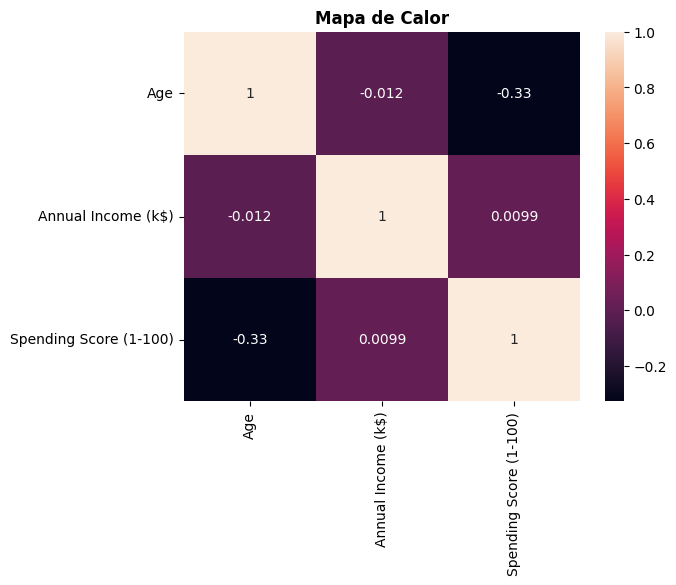

In [36]:
sns.heatmap(df[num].corr(),annot=True)
plt.title('Mapa de Calor',weight='bold')
plt.show()

In [37]:
num

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int32 
 2   Annual Income (k$)      200 non-null    int32 
 3   Spending Score (1-100)  200 non-null    int32 
dtypes: int32(3), object(1)
memory usage: 4.0+ KB


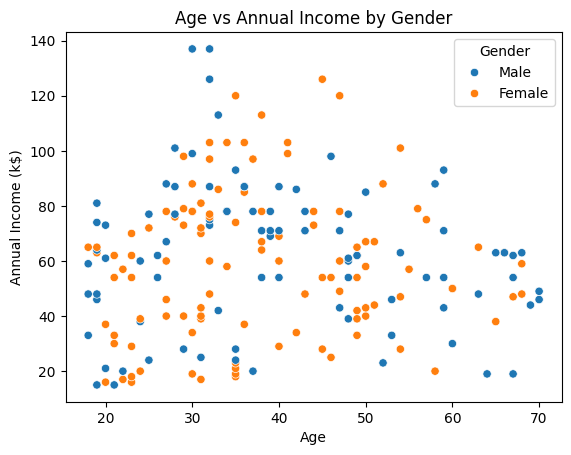

In [46]:
sns.scatterplot(data=df, x='Age', y='Annual Income (k$)',hue='Gender')
plt.title('Age vs Annual Income by Gender')
plt.show()

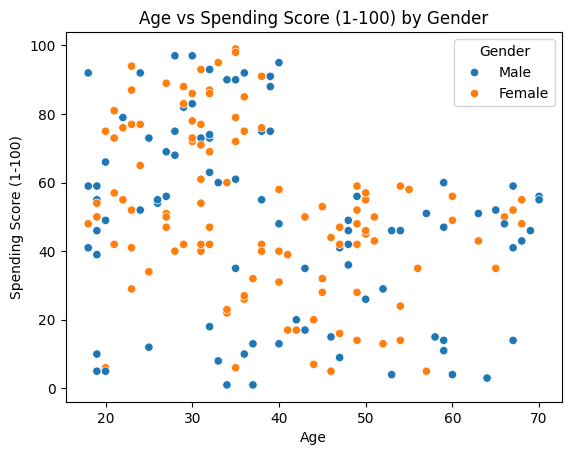

In [48]:
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)',hue='Gender')
plt.title('Age vs Spending Score (1-100) by Gender')
plt.show()

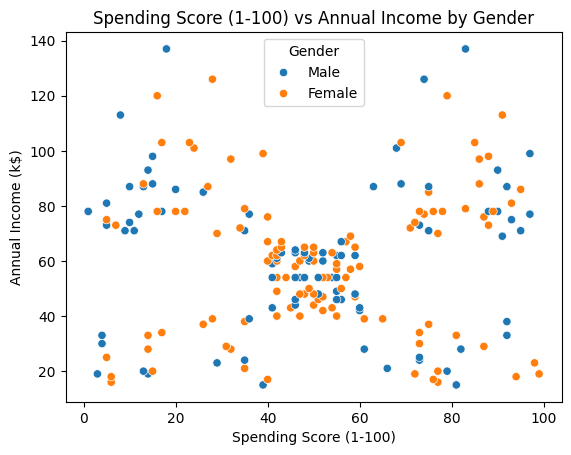

In [50]:
sns.scatterplot(data=df, x='Spending Score (1-100)', y='Annual Income (k$)',hue='Gender')
plt.title('Spending Score (1-100) vs Annual Income by Gender')
plt.show()

In [70]:
df['Age'].describe()
df_mean=df.groupby(by='Age')[['Annual Income (k$)','Spending Score (1-100)']].mean()
df_mean=pd.DataFrame(df_mean)
df_mean.head()

,Annual Income (k$),Spending Score (1-100)
Age,,
18,51.250000,60.00
19,57.000000,39.75
20,41.600000,40.20
21,38.800000,66.80
22,31.333333,70.00


In [71]:
df_mean.columns

Index(['Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [72]:
df_mean.index

Index([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 63, 64, 65, 66, 67, 68, 69, 70],
      dtype='int32', name='Age')

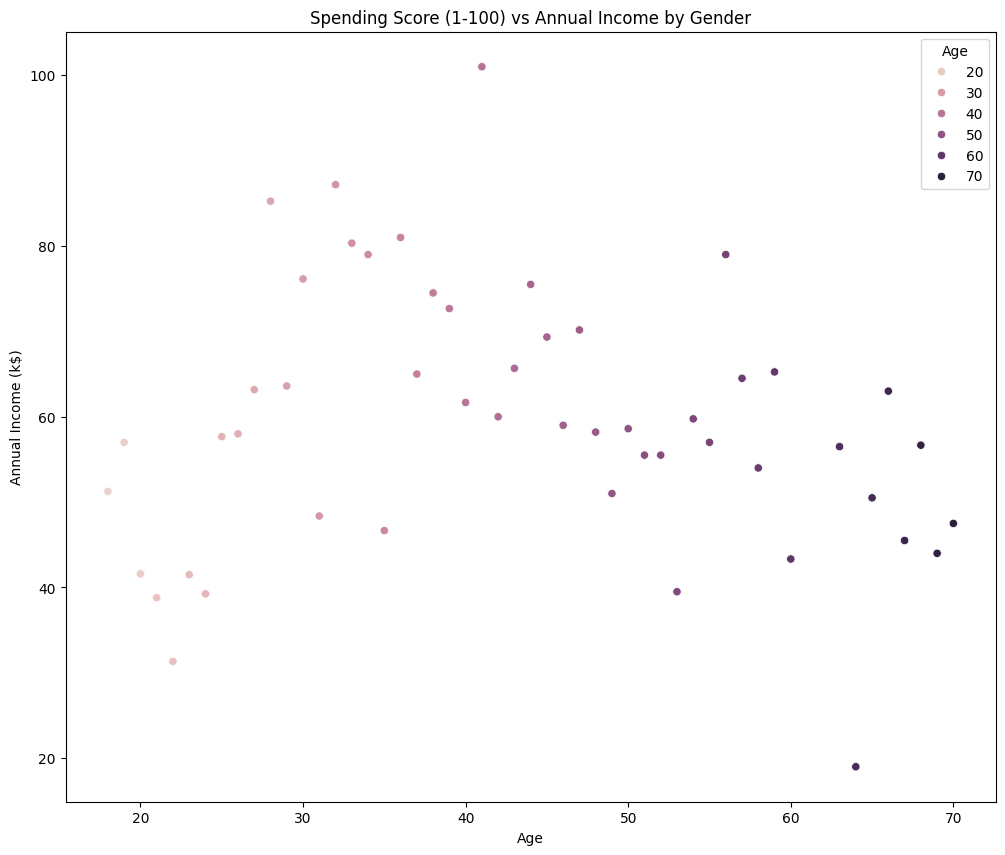

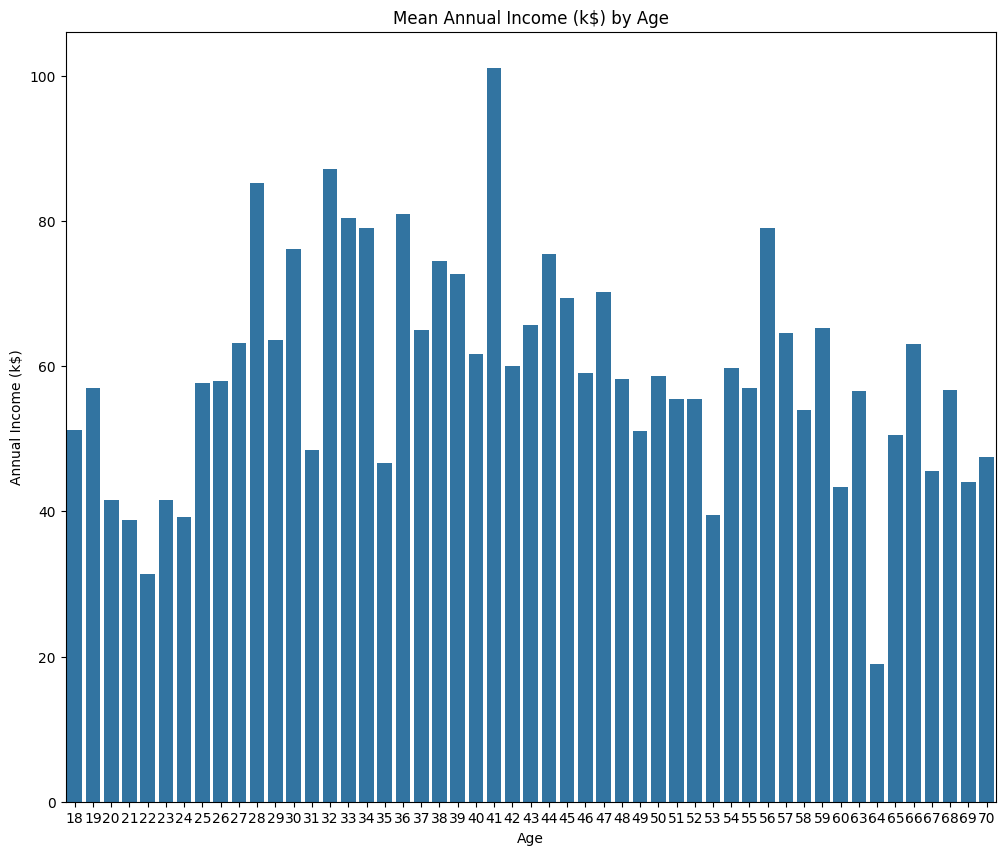

In [73]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=df_mean, x=df_mean.index, y='Annual Income (k$)',hue=df_mean.index)
plt.title('Spending Score (1-100) vs Annual Income by Gender')
plt.show()
plt.figure(figsize=(12,10))
sns.barplot(data=df_mean,x=df_mean.index, y='Annual Income (k$)')
plt.title('Mean Annual Income (k$) by Age')
plt.show()


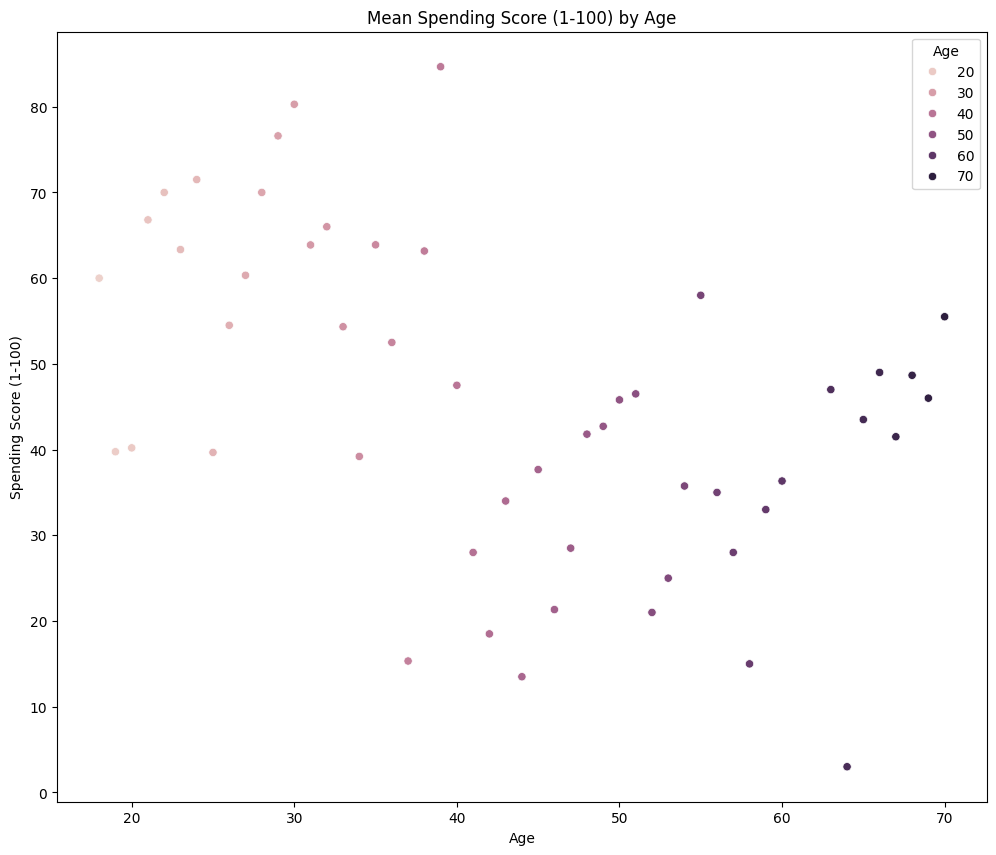

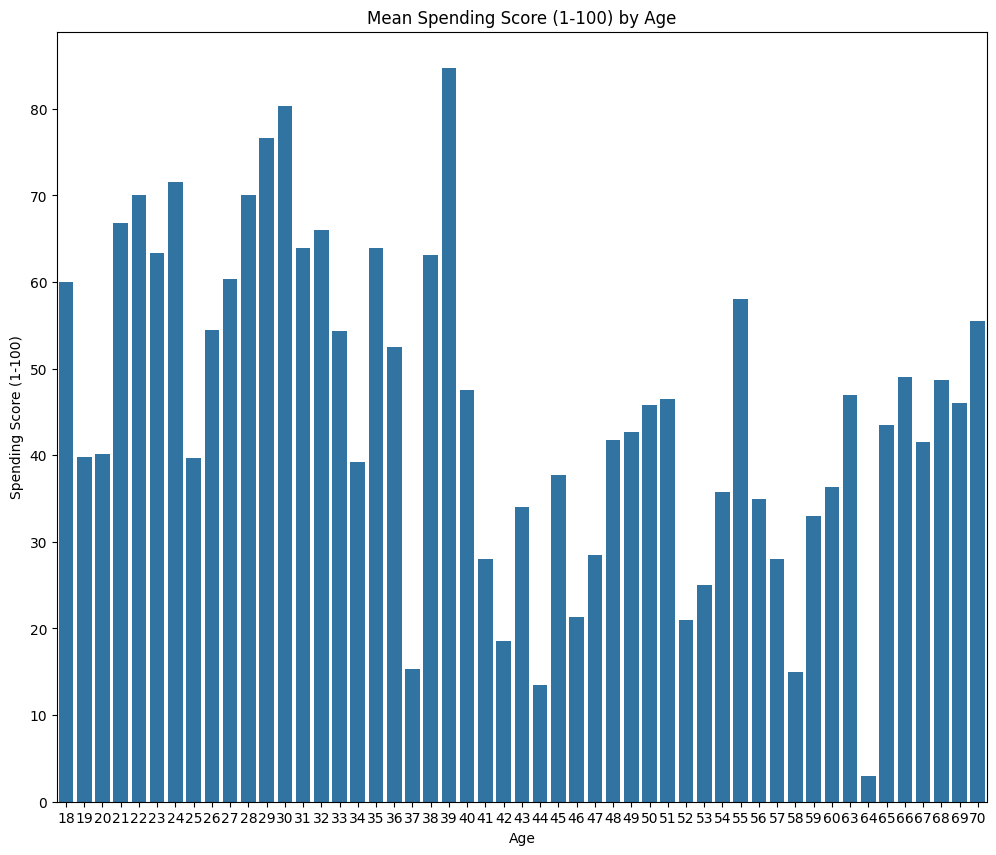

In [74]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=df_mean, x=df_mean.index, y='Spending Score (1-100)',hue=df_mean.index)
plt.title('Mean Spending Score (1-100) by Age')
plt.show()
plt.figure(figsize=(12,10))
sns.barplot(data=df_mean,x=df_mean.index, y='Spending Score (1-100)')
plt.title('Mean Spending Score (1-100) by Age')
plt.show()


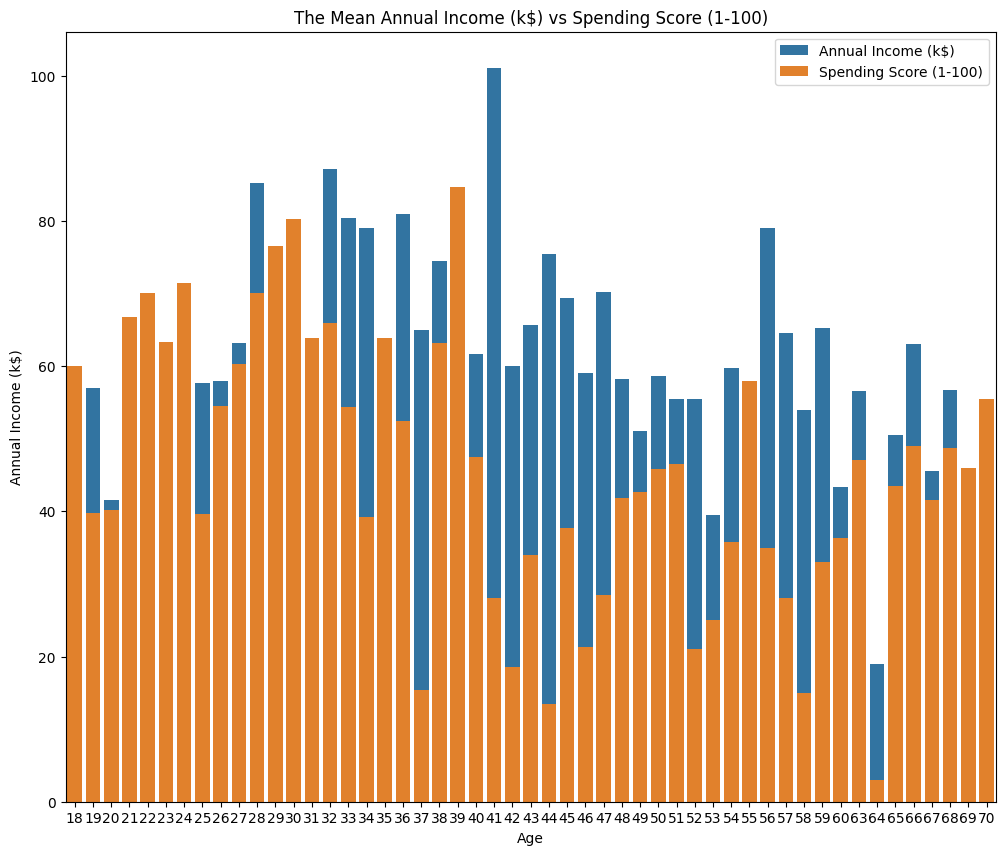

In [84]:
plt.figure(figsize=(12,10))
sns.barplot(data=df_mean,x=df_mean.index, y='Annual Income (k$)',label='Annual Income (k$)')
sns.barplot(data=df_mean,x=df_mean.index, y='Spending Score (1-100)',label='Spending Score (1-100)')
plt.title('The Mean Annual Income (k$) vs Spending Score (1-100)')
plt.show()

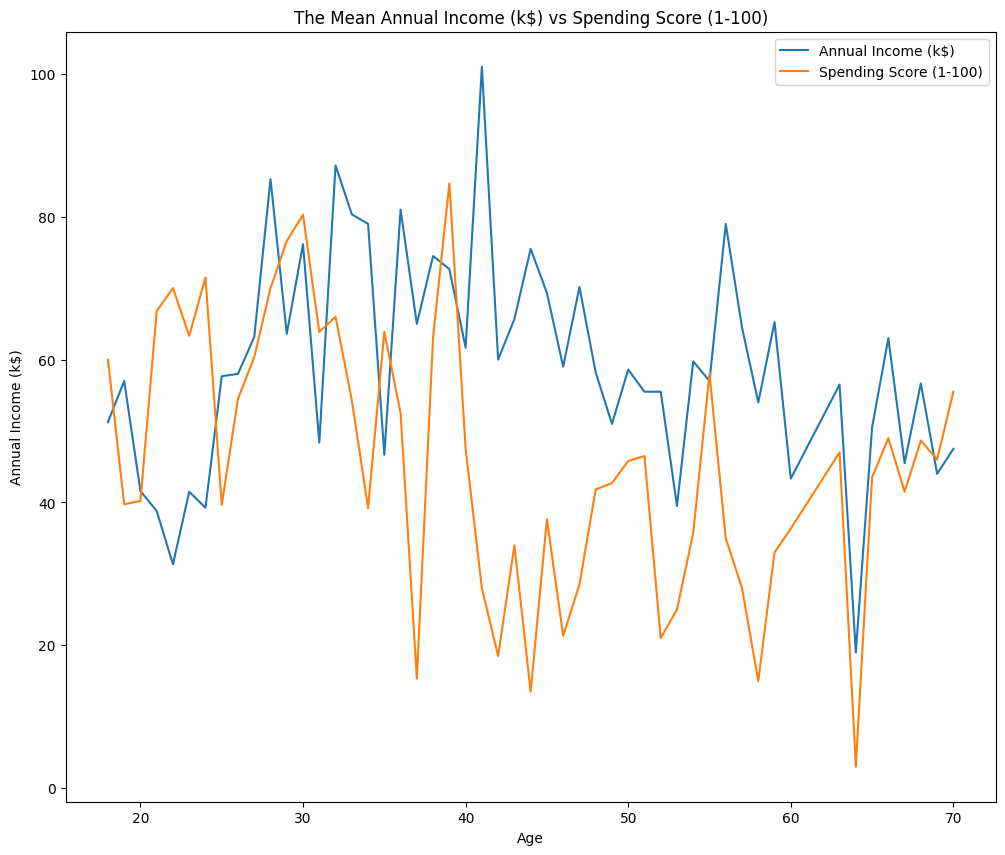

In [83]:
plt.figure(figsize=(12,10))
sns.lineplot(data=df_mean,x=df_mean.index, y='Annual Income (k$)',label='Annual Income (k$)')
sns.lineplot(data=df_mean,x=df_mean.index, y='Spending Score (1-100)',label='Spending Score (1-100)')
plt.title('The Mean Annual Income (k$) vs Spending Score (1-100)')
plt.show()

In [87]:
df_1 = df[['Age','Annual Income (k$)']]
kmeans = KMeans(n_clusters=3, max_iter=5000)
kmeans.fit(df_1)
print(kmeans.cluster_centers_)


[[28.94117647 31.21568627]
 [34.0989011  82.91208791]
 [55.01724138 51.29310345]]


In [93]:
df_1['kMEANS']=kmeans.labels_

In [94]:
df_1

,Age,Annual Income (k$),kMEANS
0,19,15,0
1,21,15,0
2,20,16,0
3,23,16,0
4,31,17,0
...,...,...,...
195,35,120,1
196,45,126,1
197,32,126,1
198,32,137,1


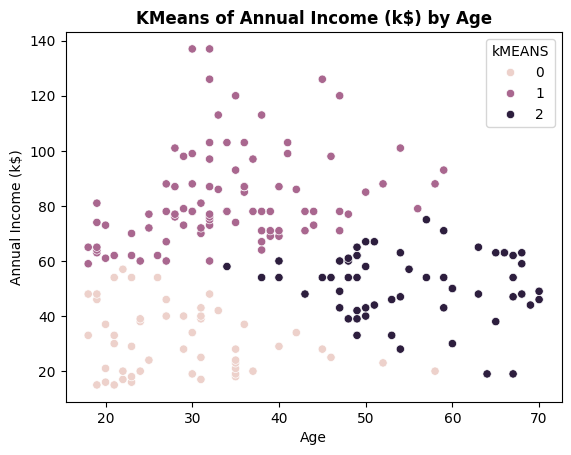

In [98]:
sns.scatterplot(data=df_1,x='Age',y='Annual Income (k$)',hue='kMEANS')
plt.title('KMeans of Annual Income (k$) by Age',fontsize=12,weight='bold')
plt.show()

In [88]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [89]:
idx0=np.where(kmeans.labels_==0)
idx1=np.where(kmeans.labels_==1)
idx2=np.where(kmeans.labels_==2)
print(len(idx0[0]), len(idx1[0]), len(idx2[0]))

51 91 58


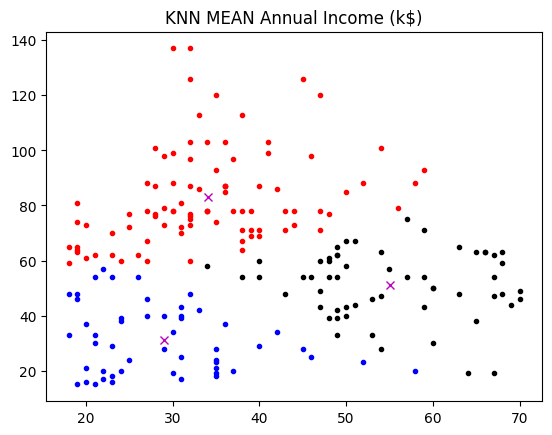

In [91]:
c1 = df_1.loc[idx0]
c2 = df_1.loc[idx1]
c3 = df_1.loc[idx2]
plt.plot(c1["Age"], c1["Annual Income (k$)"], "b.")
plt.plot(c2["Age"], c2["Annual Income (k$)"], "r.")
plt.plot(c3["Age"], c3["Annual Income (k$)"], "k.")
plt.plot(kmeans.cluster_centers_[0][0], kmeans.cluster_centers_[0][1], "mx", linewidth=10)
plt.plot(kmeans.cluster_centers_[1][0], kmeans.cluster_centers_[1][1], "mx", linewidth=10)
plt.plot(kmeans.cluster_centers_[2][0], kmeans.cluster_centers_[2][1], "mx", linewidth=10)
plt.title('KNN MEAN Annual Income (k$)')
plt.show()